<a href="https://colab.research.google.com/github/Nenad523/mastering-git/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Screenshot from 2025-08-08 12-28-05.png](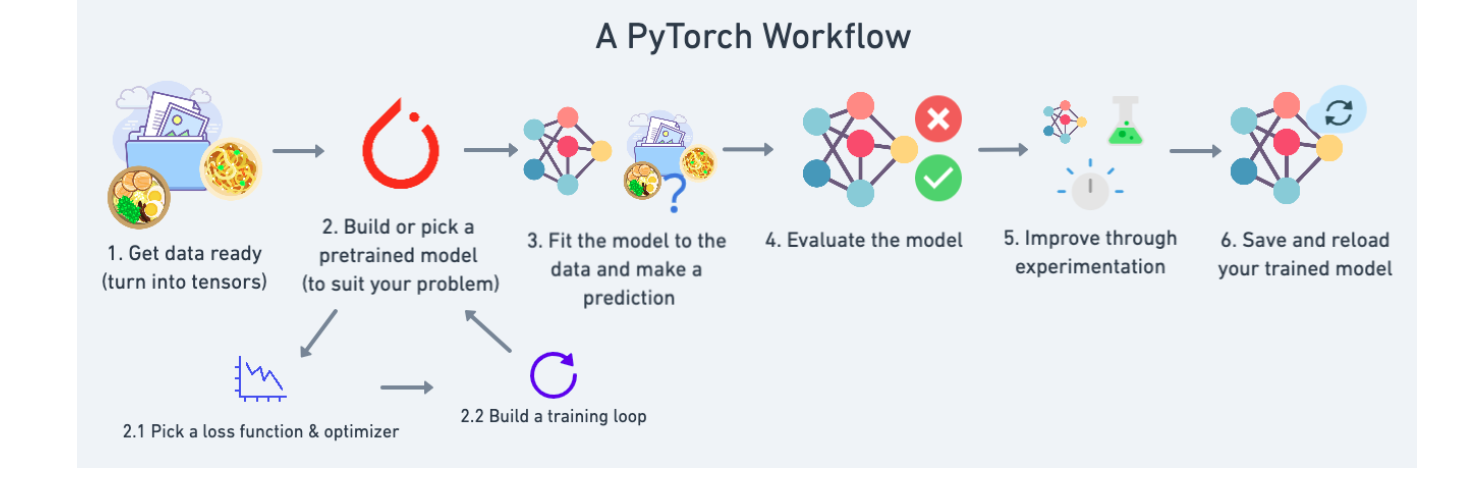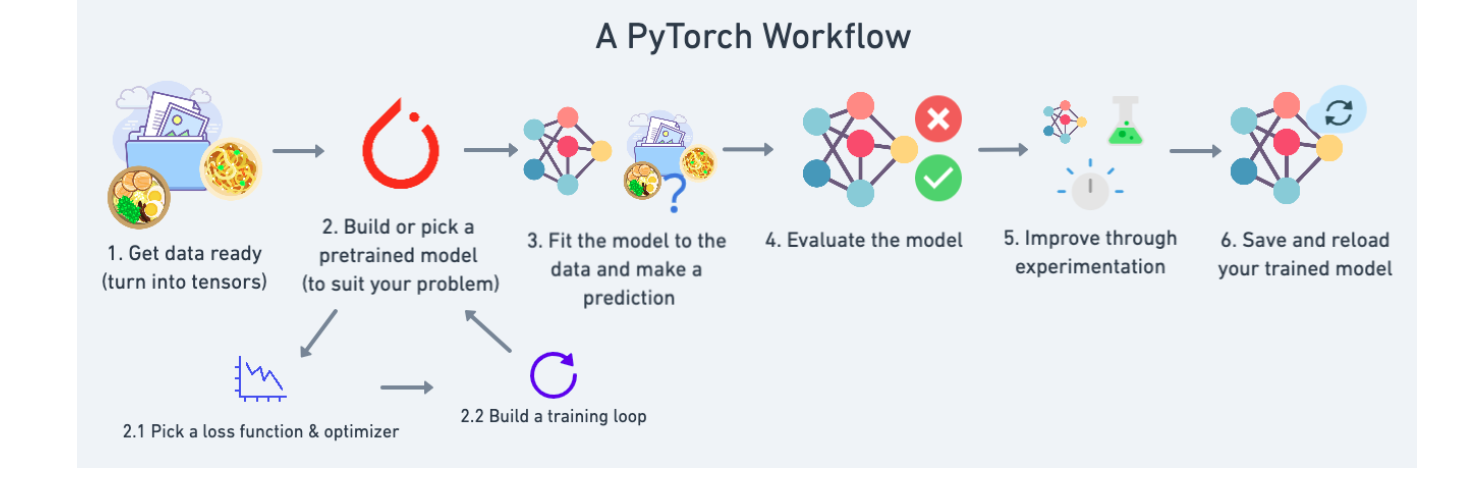)

# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.
##Links:
* torch.nn -> https://docs.pytorch.org/docs/stable/nn.html

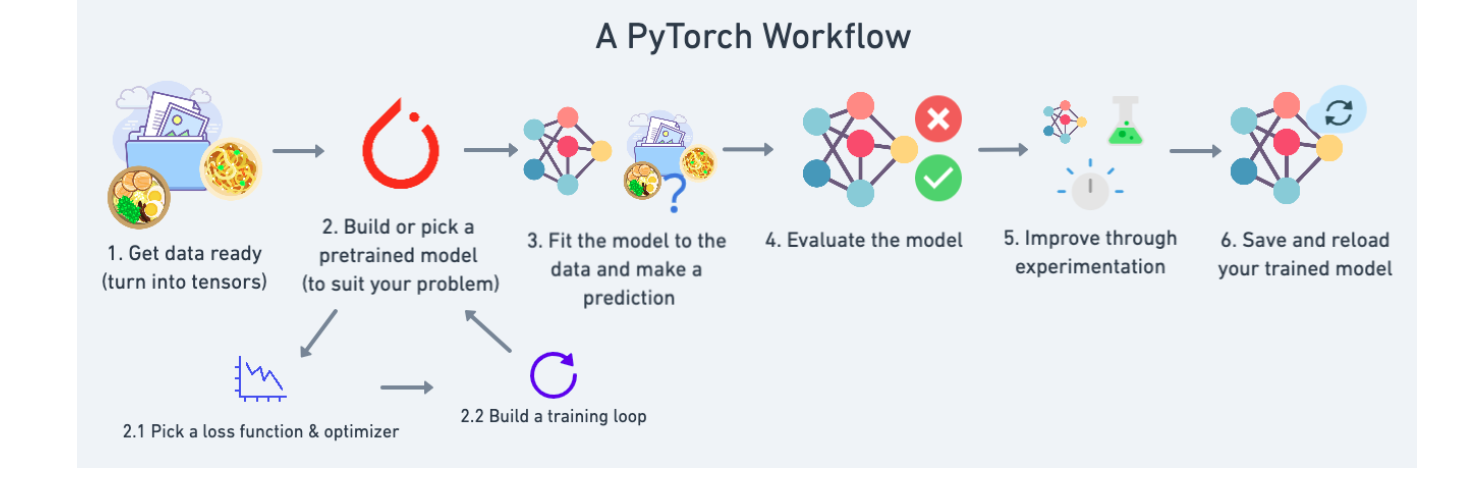

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

print(torch.__version__)


2.6.0+cu124


## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel Spreadsheet
* Images of any kind
* Videos
* Audio like songs or podcasts
* Text
*...

ML is a game of 2 parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representaition

![Screenshot from 2025-08-08 14-08-51.png](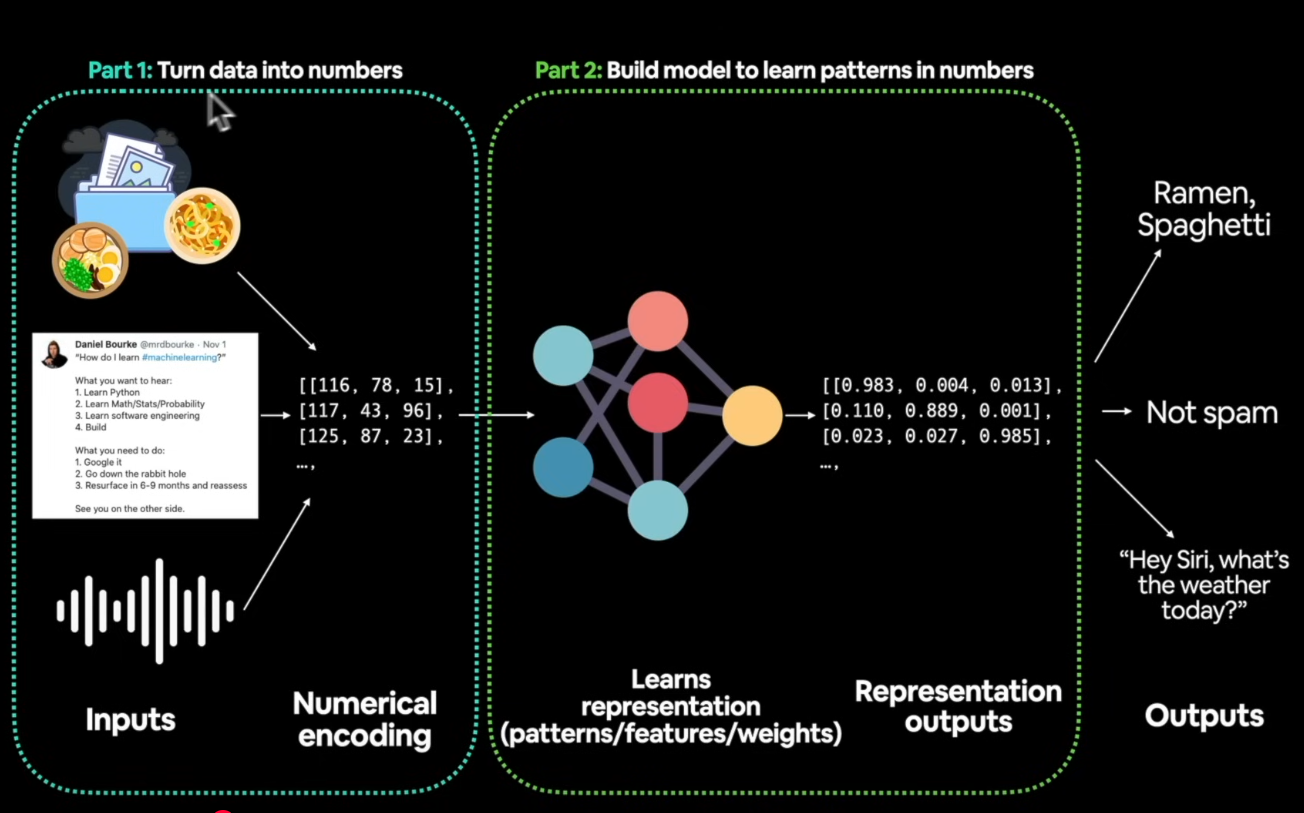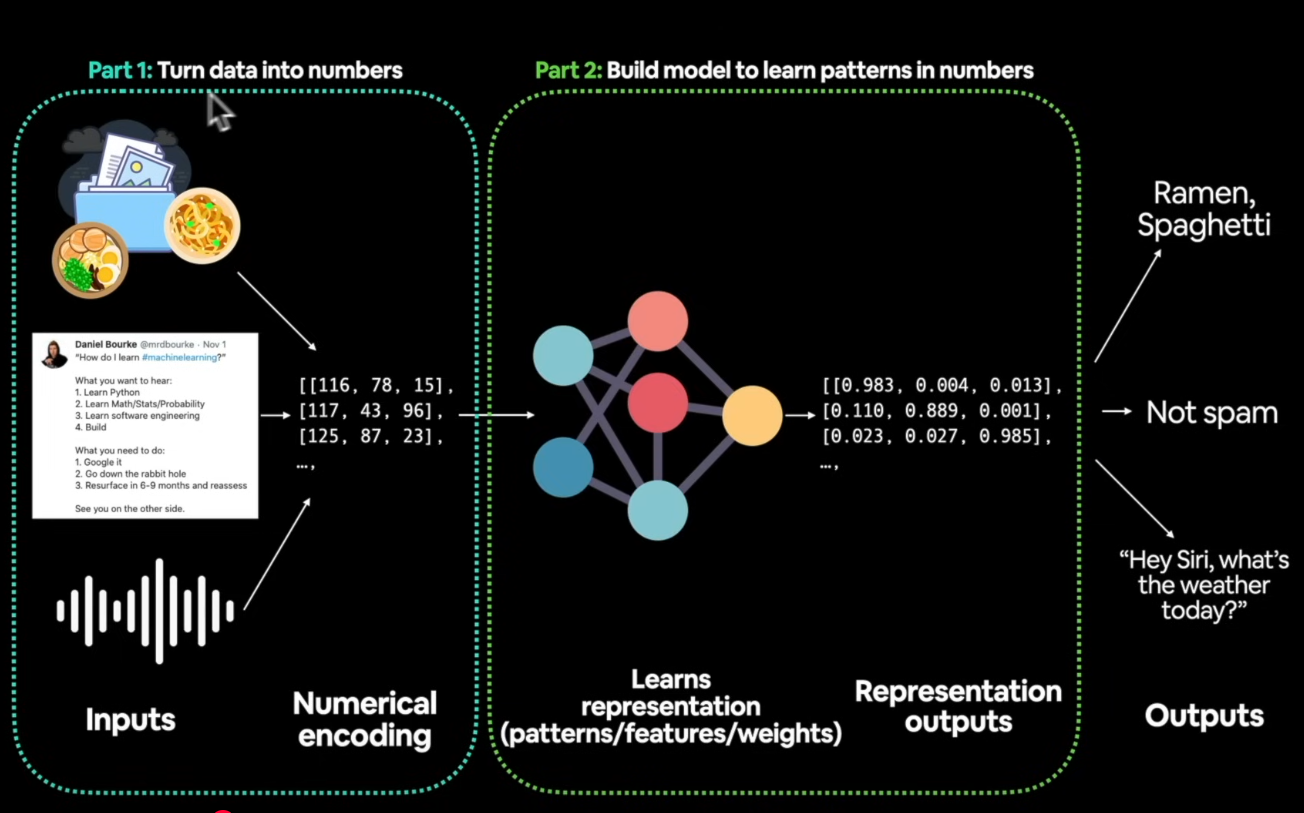)

To showcase this, let's create some *known* data using linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [2]:
# Create *known* parameters

weight = 0.7 # b
bias = 0.3 # a ---> Y = a + bX

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = bias + weight * X

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

### Splitting data intro training and test sets (one of the most important concepts in ML)

## Three datasets: (Analogy)
1. Course materials (training set) -> Models learns patterns here
2. Practice exam (validation set) -> Tune model patterns
2. Final exam (test set) -> See if the model is ready for the wild

- The test set test generalization of the model - the ability for a ML model to perform well on data it hasn't seen before.

## Let's create a training and test set.

In [4]:
# 1. Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

 How might we better visualize our data?
-> "Visualize, Visualize, Visualize"

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predicitions")

  # Show the legend
  plt.legend(prop={"size" : 14})

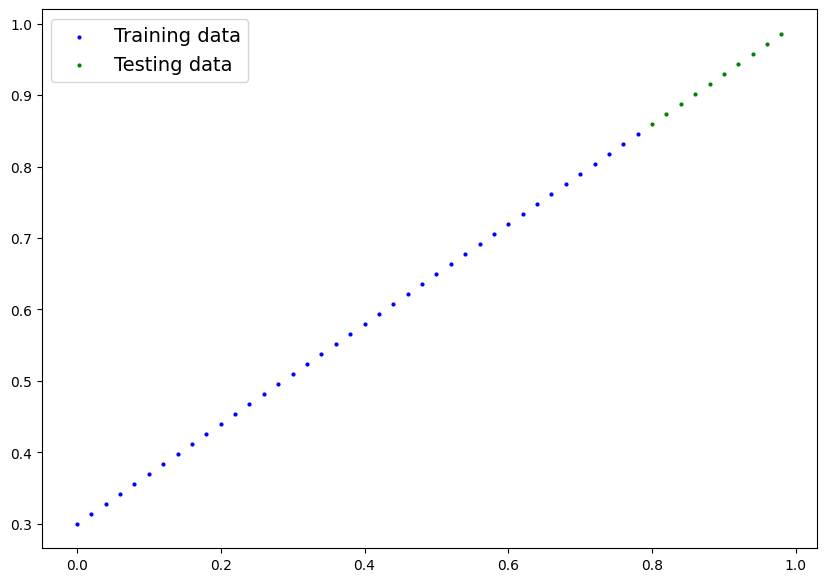

In [7]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

This is very exciting... let's do it!

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights and bias values we used to create the data)

How does it do so?

Throught two main algorithms:
1. Gradient descent (torch.autograd)
2. Backpropagation

In [8]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


* **nn.Module** -> Almost everything in PyTorch inherits from nn.Module. They are like lego building blocks of PyTorch models.
* **x** -> Input data
* **self.weight * x + self.bias** -> linear regression formula

* We start with random weight and try to adjust it to the ideal weight (same goes for bias)

### PyTorch model building essentails

* torch.nn - contains all of the buildings blocks for neural networks
* torch.nn.parameter - what parameters should our model try and learn
* torch.nn.Module - base class for all neural network models
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what operation is applied on the data, before being passed to the next layer

* Pytorc cheat sheet - https://docs.pytorch.org/tutorials/index.html

### Checking the contetns of our PyTorch models

Now we've created a model, let's see what's inside...

So we can check our model paramters or what's inside our model using `.paramters()`

In [9]:
import torch
torch.manual_seed(42)

# Crate an istance of themodel (this is a sublass of nn.Module)

model_0 = LinearRegressionModel()

# Check out the paramters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias
# Our goal is to bring paramters weights and biases to the ideal ones.

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check out model's predictive power, let's see how well it predicts `y_test' based on 'x_test'

When we pass data trhough our model, it is oging to run it trhought the `forward()` method.

In [12]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [13]:
# Make predictions(inferences) with model

with torch.inference_mode(): # Predictions are made faster with your model
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

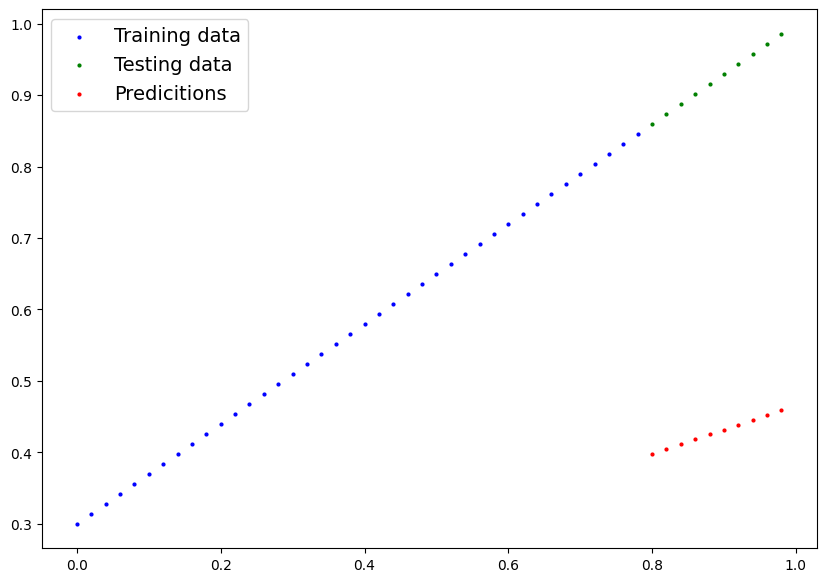

In [15]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a amodel to move from some *unknown* paramters (these may be random) to some *known* paramters.

Or in some other words from a poor representaion of the data to a better represatntion tof the data.

One way to measure how poor or how wrong the models predictions are is to use a loss function. ->

* Note: Loss finction may also be called cost fucntuion or criterion.

Thigns we need to train:

* **Loss function:** A function to measure how wrong the model's prediction are wrong.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's paramters (e.g. weights and biases in our case) to improve the loss function.

And specifially for PyTorch, we need:
* A training loop
* A testing loop

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
# Check out our models paramters (a paramters is a value that a models sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

![Screenshot from 2025-08-11 14-16-00.png](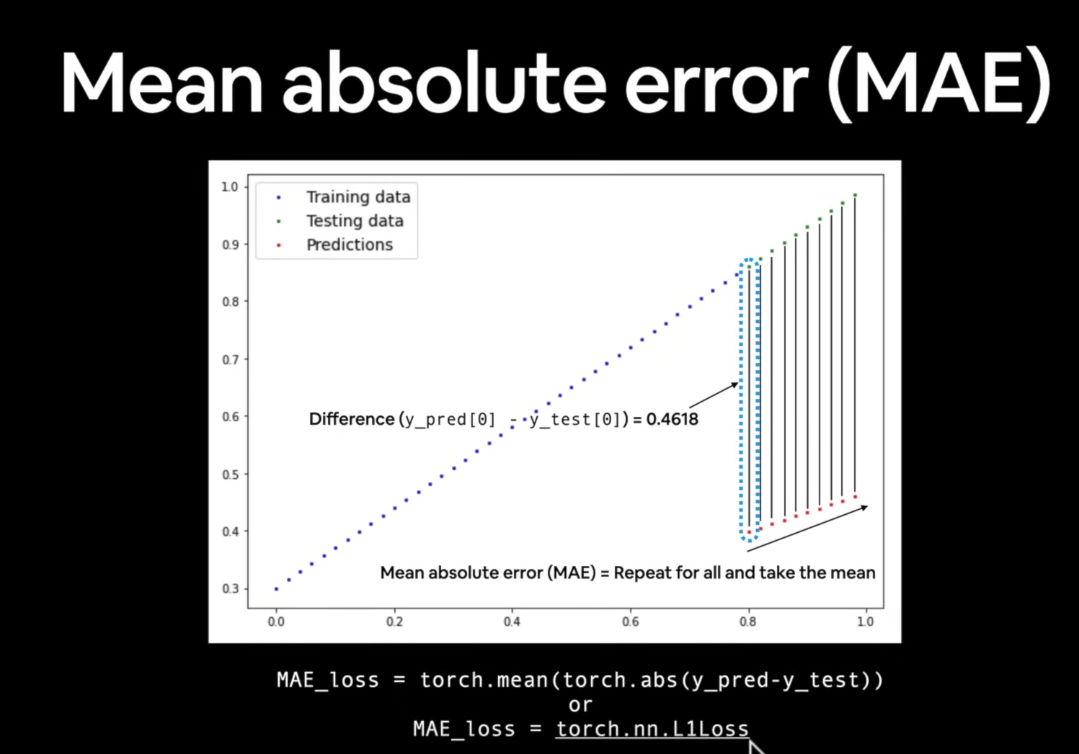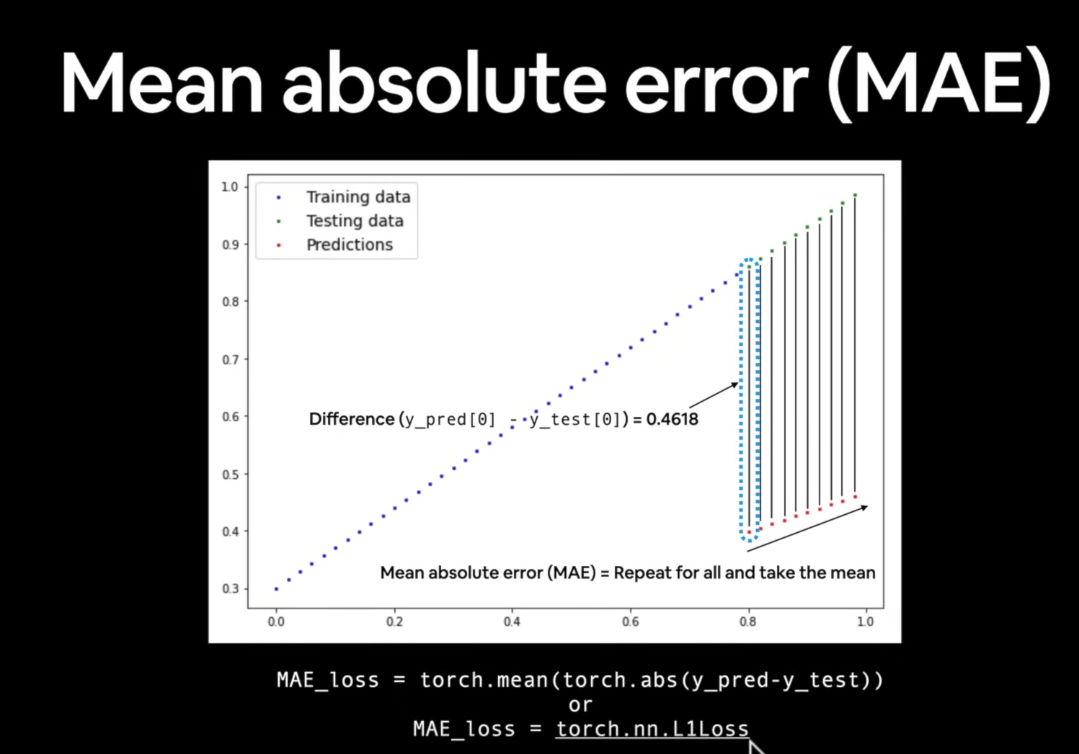)

In [18]:
# Setup a loss function
loss_fn = nn.MSELoss()

# Setup an optimizer (stochastic gradient descent, among many)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparamter (value you can set)

# How does learning rate work in training? The learnign step determines the
# how much change can it apply to params in one go.
# For example, if weight = 0.3367:
# lr = 0.1, it can change the first 3
# lr = 0.01, it can change the second 3
# lr = 0.001, it can change the 6
# lr = 0.0001, it can change the 7


### Building a training loop (and testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do ...
1. Forward pass (this invovles data moving through our model's forward() functions) to make predictions on the data.
2. Calculate the loss (compare forward pass predictions to ground truh labels)
3. Optimizer zero grad
4. Loss backward - move backwards (like forward pass but opposite way) to calculate the gradient of each of the parameters of our model to the respect of the loss. (back propagation)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss. (gradient descent)

In [19]:
epochs = 1000

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # Training
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # Track values (every epoch)
    epoch_count.append(epoch)
    loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())

    # Print every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch:03d} | Train loss: {loss.item():.4f} | Test loss: {test_loss.item():.4f}")


Epoch 000 | Train loss: 0.1049 | Test loss: 0.2364
Epoch 010 | Train loss: 0.0668 | Test loss: 0.1671
Epoch 020 | Train loss: 0.0430 | Test loss: 0.1207
Epoch 030 | Train loss: 0.0281 | Test loss: 0.0891
Epoch 040 | Train loss: 0.0187 | Test loss: 0.0675
Epoch 050 | Train loss: 0.0128 | Test loss: 0.0524
Epoch 060 | Train loss: 0.0091 | Test loss: 0.0417
Epoch 070 | Train loss: 0.0068 | Test loss: 0.0340
Epoch 080 | Train loss: 0.0053 | Test loss: 0.0285
Epoch 090 | Train loss: 0.0044 | Test loss: 0.0243
Epoch 100 | Train loss: 0.0038 | Test loss: 0.0213
Epoch 110 | Train loss: 0.0034 | Test loss: 0.0189
Epoch 120 | Train loss: 0.0031 | Test loss: 0.0171
Epoch 130 | Train loss: 0.0029 | Test loss: 0.0157
Epoch 140 | Train loss: 0.0028 | Test loss: 0.0145
Epoch 150 | Train loss: 0.0027 | Test loss: 0.0136
Epoch 160 | Train loss: 0.0026 | Test loss: 0.0129
Epoch 170 | Train loss: 0.0025 | Test loss: 0.0123
Epoch 180 | Train loss: 0.0025 | Test loss: 0.0118
Epoch 190 | Train loss: 0.0024 

## NOTE: Understand gradient descent and backpropagation

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5998])), ('bias', tensor([0.3410]))])

In [21]:
weight, bias

(0.7, 0.3)

In [22]:
with torch.inference_mode():
  y_preds = model_0(X_test)

model_0.state_dict()

OrderedDict([('weights', tensor([0.5998])), ('bias', tensor([0.3410]))])

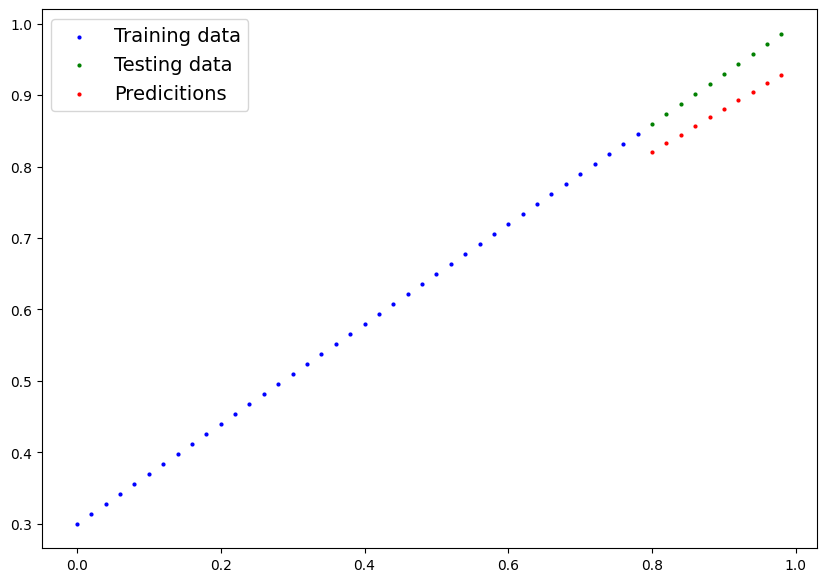

In [23]:
plot_predictions(predictions=y_preds)

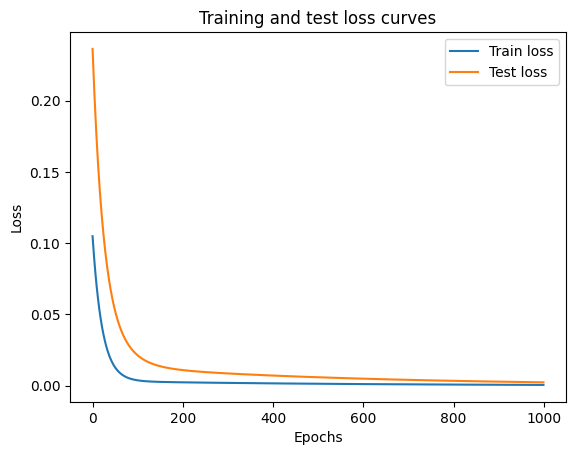

In [24]:
# Plot the loss curves

plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving a model in PyTorch

There are 3 main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Pythons pickle format.
2. `torch.load()` - alllows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

* Docs -> http://pytorch.org/tutorials/beginner/saving_loading_models.html

In [25]:
# Saving out PyTorch model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# exist_ok - if it already exists, it wont throw an error

# 2. Create models save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the models state_dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_0.pth


## Loading PyTorch model

Since we saved our model's `state_dict()` rather then entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [26]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated paramters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [27]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5998])), ('bias', tensor([0.3410]))])

In [28]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8208],
        [0.8328],
        [0.8448],
        [0.8568],
        [0.8688],
        [0.8808],
        [0.8928],
        [0.9048],
        [0.9168],
        [0.9288]])

In [29]:
# Compare loaded model preds with orginal model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back throught the steps above and see it all in one place.

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for faster computing).
If no GPU is available, the code will default to using CPU.


In [2]:
# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## 6.1 Data

## Create some data using the linear regression formula of y = weight * X + bias

In [103]:
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y feature

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [104]:
# Split data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [128]:
def plotPredictions(train_features = X_train,
                     train_labels = y_train,
                     test_features = X_test,
                     test_labels = y_test,
                     predictions : torch.Tensor = None):

  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10, 7))

  "Plot training data."
  plt.scatter(train_features, train_labels, s=4, c="blue", label="Training data")

  "Plot testing data."
  plt.scatter(test_features, test_labels, s=4, c="green", label="Testing data")

  "Plot predictions (if they exist)"
  if predictions is not None:
    plt.scatter(test_features, predictions, s=4, c="red", label="Predictions")

  plt.legend(prop={"size" : 14})



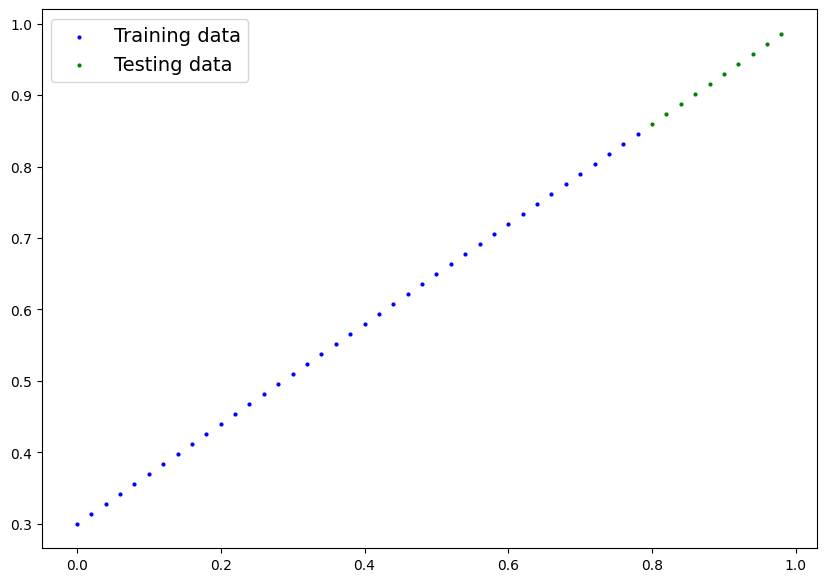

In [106]:
plotPredictions()

In [107]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    #User nn.Linear() for creating the model paramters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

    # nn.Linear creates needed parameters for us, so we do not have to deal with it

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [136]:
# Check the model current device
model_1 = LinearRegressionModel()
next(model_1.parameters()).device

device(type='cpu')

In [137]:
# Set the model to use the targe device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [109]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9848]])),
             ('linear_layer.bias', tensor([0.8555]))])

In [138]:
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

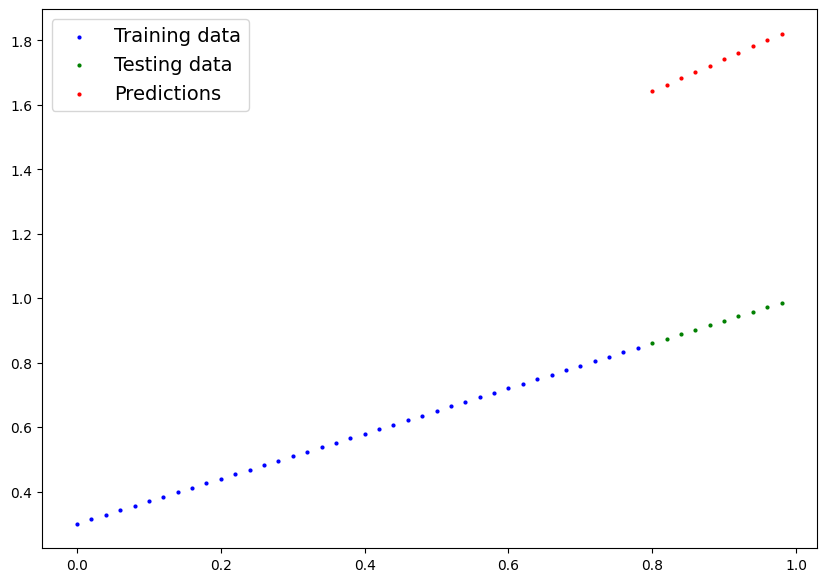

In [111]:
plotPredictions(predictions=y_preds)

In [112]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.01)

In [130]:
epochs = 10000

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):

  # Training loop

  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing loop
  model_1.eval()

  # 1. Forward pass
  with torch.inference_mode():
    y_pred = model_1(X_test)

  # 2. Calculate the loss
  test_loss = loss_fn(y_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch {epoch}:")
    print(f"Loss value: {loss.item()} <-> Test Loss value: {test_loss.item()}")

    epoch_count.append(epoch)
    loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())

Epoch 0:
Loss value: 0.9935392737388611 <-> Test Loss value: 1.585753083229065
Epoch 10:
Loss value: 0.9935392737388611 <-> Test Loss value: 1.585753083229065
Epoch 20:
Loss value: 0.9935392737388611 <-> Test Loss value: 1.585753083229065
Epoch 30:
Loss value: 0.9935392737388611 <-> Test Loss value: 1.585753083229065
Epoch 40:
Loss value: 0.9935392737388611 <-> Test Loss value: 1.585753083229065
Epoch 50:
Loss value: 0.9935392737388611 <-> Test Loss value: 1.585753083229065
Epoch 60:
Loss value: 0.9935392737388611 <-> Test Loss value: 1.585753083229065
Epoch 70:
Loss value: 0.9935392737388611 <-> Test Loss value: 1.585753083229065
Epoch 80:
Loss value: 0.9935392737388611 <-> Test Loss value: 1.585753083229065
Epoch 90:
Loss value: 0.9935392737388611 <-> Test Loss value: 1.585753083229065
Epoch 100:
Loss value: 0.9935392737388611 <-> Test Loss value: 1.585753083229065
Epoch 110:
Loss value: 0.9935392737388611 <-> Test Loss value: 1.585753083229065
Epoch 120:
Loss value: 0.99353927373886

In [131]:
with torch.inference_mode():
  y_pred = model_1(X_test)

y_pred

tensor([[-0.3503],
        [-0.3471],
        [-0.3439],
        [-0.3407],
        [-0.3375],
        [-0.3343],
        [-0.3311],
        [-0.3279],
        [-0.3247],
        [-0.3215]], device='cuda:0')

In [132]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.1601]], device='cuda:0')),
             ('linear_layer.bias', tensor([-0.4784], device='cuda:0'))])

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

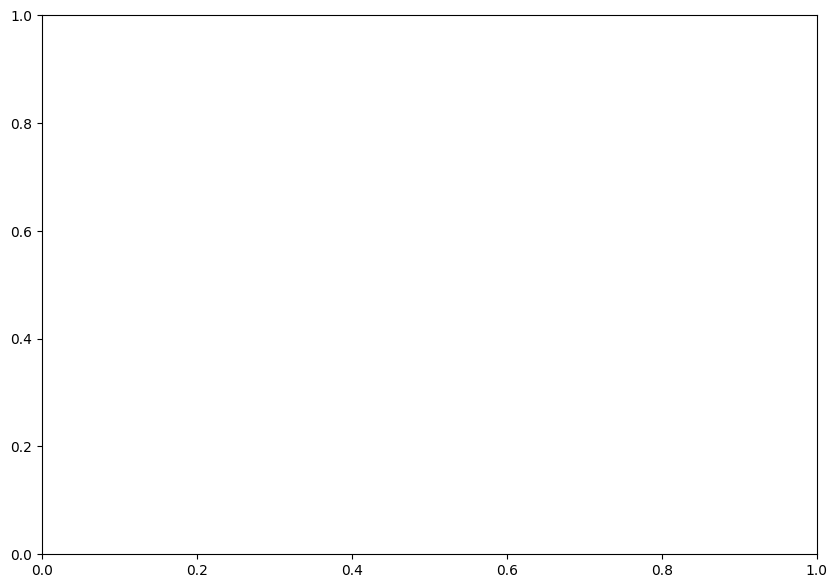

In [134]:
plotPredictions(predictions=y_pred)

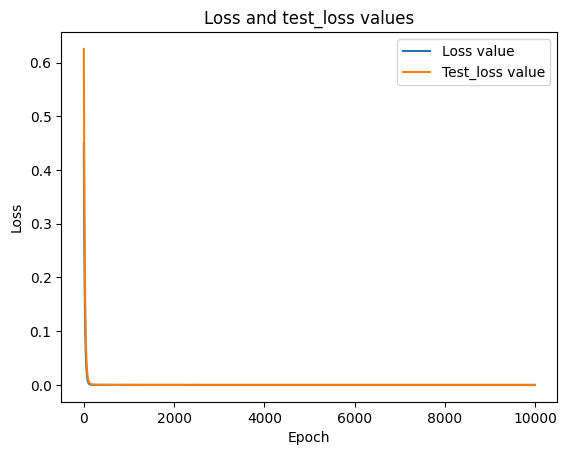

In [117]:
plt.plot(epoch_count, loss_values, label="Loss value")
plt.plot(epoch_count, test_loss_values, label="Test_loss value")

plt.title("Loss and test_loss values")
plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.legend()

In [118]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_video_model_1.pht"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_video_model_1.pht


In [119]:
loaded_model_1 = LinearRegressionModel()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>